In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib.colors as mcolors
import glob

import cartopy.feature as cfeature

In [2]:
n_lines = 6
cmap = mpl.colormaps['plasma']
windages = np.arange(0.00, 0.06, 0.01)
colors = cmap(np.linspace(0, 1, n_lines))
colour_mapping = {'{:.2f}'.format(w): c for w,c in zip(windages, colors)}
windages_str = ['0.0', '0.01', '0.02', '0.03', '0.04', '0.05']

starts = [datetime.datetime(2025,1,3,6,45),]
data_dir='/data/viking-buoy-2025/'

orig_lat = 47.53633333333 
orig_lon = -52.58616666666

# SMOC and ERA5

0.0
0.01
0.02
0.03
0.04
0.05


Text(0.5, 0.98, 'SMOC-ERA5-recirculate')

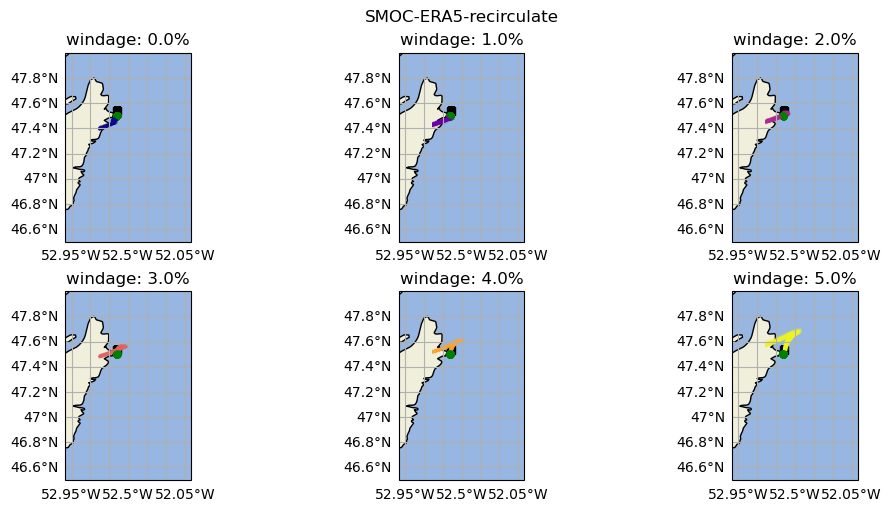

In [3]:
drift='forward'

fig, axs = plt.subplots(2,3,subplot_kw={'projection': ccrs.PlateCarree()},
                            figsize=(10,5),
                            sharex=True, sharey=True, constrained_layout=True)
end_times={}
end_lons={}
end_lats={}
for s in starts:
    sd = s.strftime("%Y%m%d%H")
    for windage, ax in zip(windages_str, axs.flatten()):
        files = glob.glob(f'{data_dir}/*{sd}*{drift}*wind{windage}-diff*.nc')
        d = xr.open_dataset(files[0])
        #dsel = d.sel(time=slice(drifter.TIME.values[0], drifter.TIME.values[-1]))
        dp=d.where((d.lon<360) | (d.lat<360), np.nan)
        print(windage)
        end_times[windage] = []
        end_lons[windage] = []
        end_lats[windage] = []
        for t in dp.trajectory.values:
            dp_t = dp.sel(trajectory=t)
            lons = np.ma.masked_invalid(dp_t.lon.values)
            lats = np.ma.masked_invalid(dp_t.lat.values)
            ax.plot(lons[~lons.mask], lats[~lats.mask], color=colour_mapping['{:.2f}'.format(float(windage))], 
                    lw=0.1,transform=ccrs.PlateCarree())
            ax.plot(lons[0], lats[0], 'g.')
            moving=dp_t.where(dp_t['moving']==1, drop=True)
            end_times[windage].append(moving.time.max().values)
            end_lons[windage].append(moving.lon.values[-1])
            end_lats[windage].append(moving.lat.values[-1])
        #ax.plot(drifter.LONGITUDE, drifter.LATITUDE, transform=ccrs.PlateCarree())
        #ax.plot(drifter.LONGITUDE.values[0], drifter.LATITUDE.values[0], 'go', transform=ccrs.PlateCarree())
        ax.coastlines()
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.OCEAN)

        ax.set_xlim([-53,-52])
        ax.set_ylim([46.5,48])
        ax.gridlines(draw_labels=['bottom', 'left'])
        ax.set_title(f'windage: {float(windage)*100}%')
        ax.plot(orig_lon, orig_lat, 'sk', transform=ccrs.PlateCarree(),zorder=0)
fig.suptitle('SMOC-ERA5-recirculate')

In [4]:
for w , a  in end_times.items():
    print(w, np.array(a).max(), np.array(a).min())
for w , a  in end_lons.items():
    print(w, np.array(a).max(), np.array(a).min(), np.array(a).mean(),)
for w , a  in end_lats.items():
    print(w, np.array(a).max(), np.array(a).min(), np.array(a).mean(),)

0.0 2025-01-05T04:45:00.000000000 2025-01-05T01:45:00.000000000
0.01 2025-01-05T04:45:00.000000000 2025-01-05T01:45:00.000000000
0.02 2025-01-05T04:45:00.000000000 2025-01-05T01:45:00.000000000
0.03 2025-01-05T04:45:00.000000000 2025-01-05T01:45:00.000000000
0.04 2025-01-05T04:45:00.000000000 2025-01-05T02:45:00.000000000
0.05 2025-01-05T04:45:00.000000000 2025-01-05T02:45:00.000000000
0.0 -52.718952 -52.734306 -52.727753
0.01 -52.714195 -52.734337 -52.72517
0.02 -52.7083 -52.73435 -52.722267
0.03 -52.70059 -52.734364 -52.718388
0.04 -52.69666 -52.734344 -52.716625
0.05 -52.695576 -52.734356 -52.716366
0.0 47.419594 47.382996 47.400204
0.01 47.454853 47.40493 47.430763
0.02 47.47861 47.43813 47.45601
0.03 47.50486 47.466297 47.485374
0.04 47.542393 47.50553 47.523
0.05 47.614964 47.552917 47.580097


# CIOPSE and HRDPS

In [5]:
data_dir='/data/viking-buoy-2025/ciopse-hrdps-diff5/'

0.0
0.01
0.02
0.03
0.04
0.05


Text(0.5, 0.98, 'CIOPSE-HRDPS')

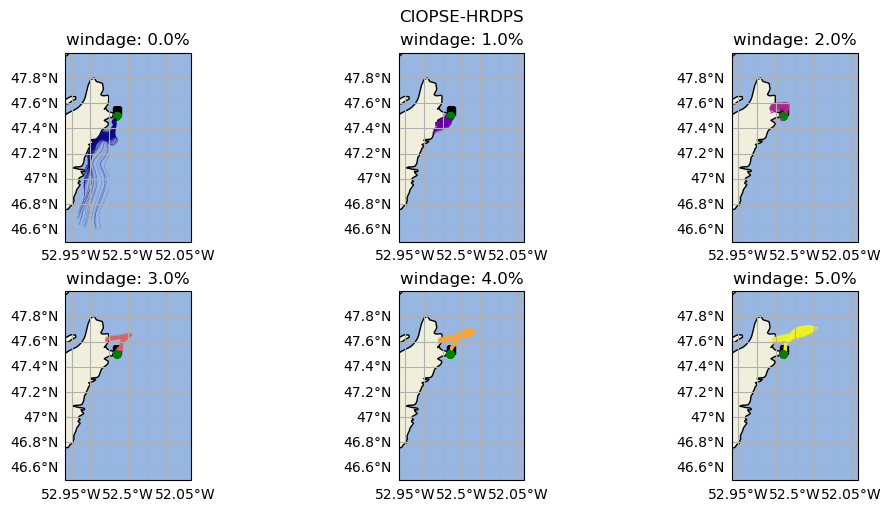

In [6]:
drift='forward'

fig, axs = plt.subplots(2,3,subplot_kw={'projection': ccrs.PlateCarree()},
                            figsize=(10,5),
                            sharex=True, sharey=True, constrained_layout=True)
end_times={}
end_lons={}
end_lats={}
for s in starts:
    sd = s.strftime("%Y%m%d%H")
    for windage, ax in zip(windages_str, axs.flatten()):
        files = glob.glob(f'{data_dir}/*{sd}*{drift}*wind{windage}_diff*.nc')
        d = xr.open_dataset(files[0])
        #dsel = d.sel(time=slice(drifter.TIME.values[0], drifter.TIME.values[-1]))
        dp=d.where((d.lon<360) | (d.lat<360), np.nan)
        print(windage)
        end_times[windage] = []
        end_lons[windage] = []
        end_lats[windage] = []
        for t in dp.trajectory.values:
            dp_t = dp.sel(trajectory=t)
            lons = np.ma.masked_invalid(dp_t.lon.values)
            lats = np.ma.masked_invalid(dp_t.lat.values)
            ax.plot(lons[~lons.mask], lats[~lats.mask], color=colour_mapping['{:.2f}'.format(float(windage))], 
                    lw=0.1,transform=ccrs.PlateCarree())
            ax.plot(lons[0], lats[0], 'g.')
            moving=dp_t.where(dp_t['moving']==1, drop=True)
            end_times[windage].append(moving.time.max().values)
            end_lons[windage].append(moving.lon.values[-1])
            end_lats[windage].append(moving.lat.values[-1])
        #ax.plot(drifter.LONGITUDE, drifter.LATITUDE, transform=ccrs.PlateCarree())
        #ax.plot(drifter.LONGITUDE.values[0], drifter.LATITUDE.values[0], 'go', transform=ccrs.PlateCarree())
        ax.coastlines()
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.OCEAN)

        ax.set_xlim([-53,-52])
        ax.set_ylim([46.5,48])
        ax.gridlines(draw_labels=['bottom', 'left'])
        ax.set_title(f'windage: {float(windage)*100}%')
        ax.plot(orig_lon, orig_lat, 'sk', transform=ccrs.PlateCarree(),zorder=0)
fig.suptitle('CIOPSE-HRDPS')

In [7]:
for w , a  in end_times.items():
    print(w, np.array(a).max(), np.array(a).min())
for w , a  in end_lons.items():
    print(w, np.array(a).max(), np.array(a).min(), np.array(a).mean(),)
for w , a  in end_lats.items():
    print(w, np.array(a).max(), np.array(a).min(), np.array(a).mean(),)

0.0 2025-01-06T23:45:00.000000000 2025-01-05T10:45:00.000000000
0.01 2025-01-05T09:45:00.000000000 2025-01-05T02:45:00.000000000
0.02 2025-01-05T05:45:00.000000000 2025-01-05T02:45:00.000000000
0.03 2025-01-05T06:45:00.000000000 2025-01-05T03:45:00.000000000
0.04 2025-01-05T07:45:00.000000000 2025-01-05T05:45:00.000000000
0.05 2025-01-05T07:45:00.000000000 2025-01-05T04:45:00.000000000
0.0 -52.7076 -52.90607 -52.787815
0.01 -52.641 -52.737118 -52.698025
0.02 -52.649174 -52.702686 -52.689625
0.03 -52.652863 -52.68259 -52.667747
0.04 -52.64797 -52.695545 -52.67063
0.05 -52.633377 -52.69518 -52.663376
0.0 47.369263 46.59627 47.18049
0.01 47.52537 47.34598 47.42462
0.02 47.598064 47.506565 47.563683
0.03 47.648006 47.59613 47.620483
0.04 47.639145 47.58015 47.609062
0.05 47.65314 47.575005 47.608315


# SMOC and ERA5 - recirculate

The coastline representation is so bad in this version that I really don't think these results can be trusted. 

In [8]:
data_dir='/data/viking-buoy-2025/smoc-era5-recirculate/'

0.0
0.01
0.02
0.03
0.04
0.05


Text(0.5, 0.98, 'SMOC-ERA5-recirculate')

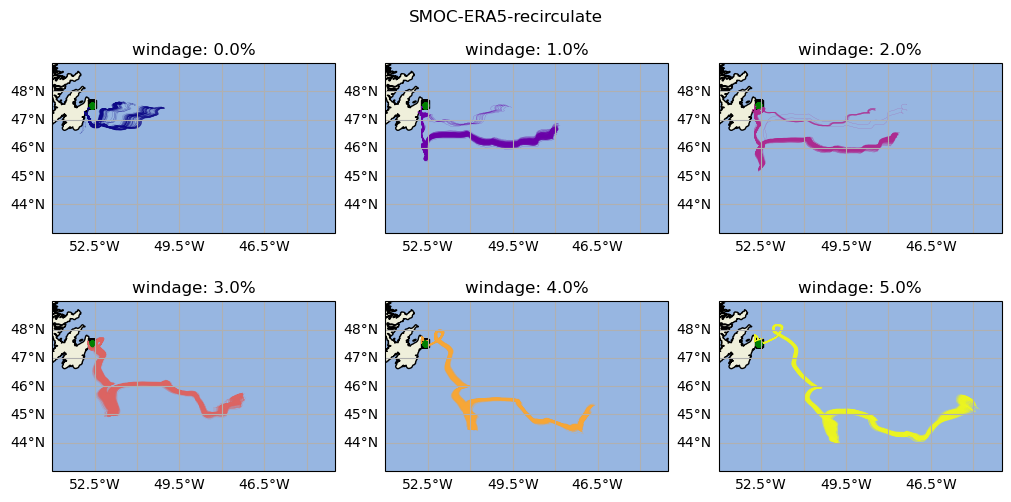

In [9]:
drift='forward'

fig, axs = plt.subplots(2,3,subplot_kw={'projection': ccrs.PlateCarree()},
                            figsize=(10,5),
                            sharex=True, sharey=True, constrained_layout=True)
end_times={}
end_lons={}
end_lats={}
for s in starts:
    sd = s.strftime("%Y%m%d%H")
    for windage, ax in zip(windages_str, axs.flatten()):
        files = glob.glob(f'{data_dir}/*{sd}*{drift}*wind{windage}-diff*.nc')
        d = xr.open_dataset(files[0])
        #dsel = d.sel(time=slice(drifter.TIME.values[0], drifter.TIME.values[-1]))
        dp=d.where((d.lon<360) | (d.lat<360), np.nan)
        print(windage)
        end_times[windage] = []
        end_lons[windage] = []
        end_lats[windage] = []
        for t in dp.trajectory.values:
            dp_t = dp.sel(trajectory=t)
            lons = np.ma.masked_invalid(dp_t.lon.values)
            lats = np.ma.masked_invalid(dp_t.lat.values)
            ax.plot(lons[~lons.mask], lats[~lats.mask], color=colour_mapping['{:.2f}'.format(float(windage))], 
                    lw=0.1,transform=ccrs.PlateCarree())
            ax.plot(lons[0], lats[0], 'g.')
            moving=dp_t.where(dp_t['moving']==1, drop=True)
            end_times[windage].append(moving.time.max().values)
            end_lons[windage].append(moving.lon.values[-1])
            end_lats[windage].append(moving.lat.values[-1])
        #ax.plot(drifter.LONGITUDE, drifter.LATITUDE, transform=ccrs.PlateCarree())
        #ax.plot(drifter.LONGITUDE.values[0], drifter.LATITUDE.values[0], 'go', transform=ccrs.PlateCarree())
        ax.coastlines()
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.OCEAN)

        ax.set_xlim([-54,-44])
        ax.set_ylim([43,49])
        ax.gridlines(draw_labels=['bottom', 'left'])
        ax.set_title(f'windage: {float(windage)*100}%')
        ax.plot(orig_lon, orig_lat, 'sk', transform=ccrs.PlateCarree(),zorder=0)
fig.suptitle('SMOC-ERA5-recirculate')

In [10]:
for w , a  in end_times.items():
    print(w, np.array(a).max(), np.array(a).min())
for w , a  in end_lons.items():
    print(w, np.array(a).max(), np.array(a).min(), np.array(a).mean(),)
for w , a  in end_lats.items():
    print(w, np.array(a).max(), np.array(a).min(), np.array(a).mean(),)

0.0 2025-01-31T23:45:00.000000000 2025-01-31T23:45:00.000000000
0.01 2025-01-31T23:45:00.000000000 2025-01-31T23:45:00.000000000
0.02 2025-01-31T23:45:00.000000000 2025-01-31T23:45:00.000000000
0.03 2025-01-31T23:45:00.000000000 2025-01-31T23:45:00.000000000
0.04 2025-01-31T23:45:00.000000000 2025-01-31T23:45:00.000000000
0.05 2025-01-31T23:45:00.000000000 2025-01-31T23:45:00.000000000
0.0 -50.02852 -52.80734 -51.129436
0.01 -47.82748 -50.035564 -48.02418
0.02 -47.349148 -48.5107 -47.77826
0.03 -47.17923 -48.025433 -47.36415
0.04 -46.584 -47.120422 -46.828102
0.05 -44.784954 -45.396492 -45.0907
0.0 47.592426 46.771156 47.500164
0.01 47.510838 46.47329 46.68082
0.02 47.51878 46.168858 46.468548
0.03 45.780346 45.39406 45.668392
0.04 45.370205 44.651455 45.146935
0.05 45.68562 45.188335 45.5176


# CIOPSE HRDPS - recriculate

Can't trust this because some HRDPS data was missing for Jan 7 ans 26! Winds are likely interpolated over those dates which is not the best choice. 

In [11]:
data_dir='/data/viking-buoy-2025/ciopse-hrdps-recirculate/'

0.0
0.01
0.02
0.03
0.04
0.05


Text(0.5, 0.98, 'CIOPSE-HRDPS-recirculate')

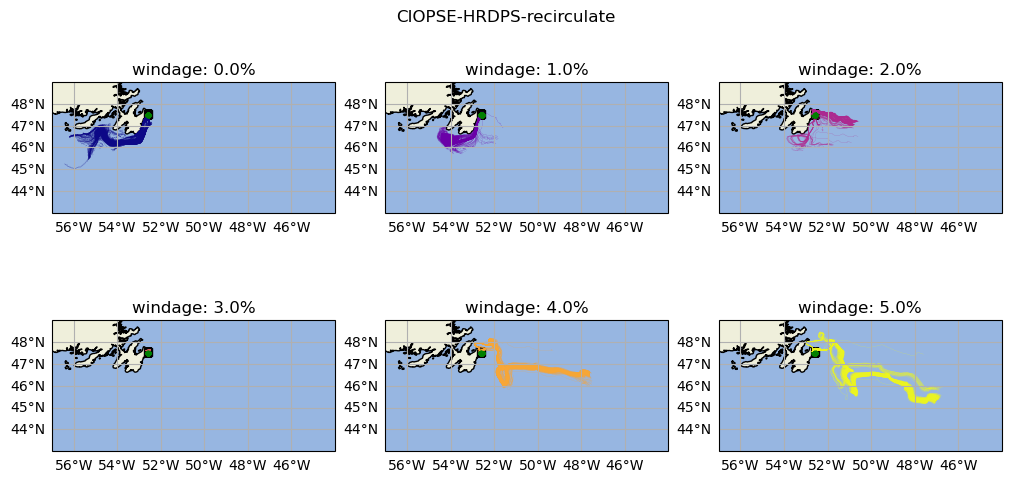

In [12]:
drift='forward'

fig, axs = plt.subplots(2,3,subplot_kw={'projection': ccrs.PlateCarree()},
                            figsize=(10,5),
                            sharex=True, sharey=True, constrained_layout=True)
end_times={}
end_lons={}
end_lats={}
for s in starts:
    sd = s.strftime("%Y%m%d%H")
    for windage, ax in zip(windages_str, axs.flatten()):
        files = glob.glob(f'{data_dir}/*{sd}*{drift}*wind{windage}_diff*.nc')
        d = xr.open_dataset(files[0])
        #dsel = d.sel(time=slice(drifter.TIME.values[0], drifter.TIME.values[-1]))
        dp=d.where((d.lon<360) | (d.lat<360), np.nan)
        print(windage)
        end_times[windage] = []
        end_lons[windage] = []
        end_lats[windage] = []
        for t in dp.trajectory.values:
            dp_t = dp.sel(trajectory=t)
            lons = np.ma.masked_invalid(dp_t.lon.values)
            lats = np.ma.masked_invalid(dp_t.lat.values)
            ax.plot(lons[~lons.mask], lats[~lats.mask], color=colour_mapping['{:.2f}'.format(float(windage))], 
                    lw=0.1,transform=ccrs.PlateCarree())
            ax.plot(lons[0], lats[0], 'g.')
            moving=dp_t.where(dp_t['moving']==1, drop=True)
            end_times[windage].append(moving.time.max().values)
            end_lons[windage].append(moving.lon.values[-1])
            end_lats[windage].append(moving.lat.values[-1])
        #ax.plot(drifter.LONGITUDE, drifter.LATITUDE, transform=ccrs.PlateCarree())
        #ax.plot(drifter.LONGITUDE.values[0], drifter.LATITUDE.values[0], 'go', transform=ccrs.PlateCarree())
        ax.coastlines()
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.OCEAN)

        ax.set_xlim([-57,-44])
        ax.set_ylim([43,49])
        ax.gridlines(draw_labels=['bottom', 'left'])
        ax.set_title(f'windage: {float(windage)*100}%')
        ax.plot(orig_lon, orig_lat, 'sk', transform=ccrs.PlateCarree(),zorder=0)
fig.suptitle('CIOPSE-HRDPS-recirculate')

In [13]:
for w , a  in end_times.items():
    print(w, np.array(a).max(), np.array(a).min())
for w , a  in end_lons.items():
    print(w, np.array(a).max(), np.array(a).min(), np.array(a).mean(),)
for w , a  in end_lats.items():
    print(w, np.array(a).max(), np.array(a).min(), np.array(a).mean(),)

0.0 2025-01-27T23:45:00.000000000 2025-01-27T23:45:00.000000000
0.01 2025-01-27T23:45:00.000000000 2025-01-27T23:45:00.000000000
0.02 2025-01-27T23:45:00.000000000 2025-01-27T23:45:00.000000000
0.03 2025-01-27T23:45:00.000000000 2025-01-27T23:45:00.000000000
0.04 2025-01-27T23:45:00.000000000 2025-01-27T23:45:00.000000000
0.05 2025-01-27T23:45:00.000000000 2025-01-27T23:45:00.000000000
0.0 -52.79102 -56.4473 -54.987263
0.01 -51.593945 -54.43813 -53.92581
0.02 -50.5464 -53.368595 -51.141518
0.03 -52.68496 -52.696663 -52.693386
0.04 -47.49466 -52.761467 -47.860153
0.05 -46.715977 -52.726627 -47.638153
0.0 47.28388 45.2421 46.267773
0.01 46.945236 45.698112 46.302956
0.02 47.575935 45.844646 46.966988
0.03 47.63249 47.593773 47.609737
0.04 47.68195 45.984016 46.559246
0.05 47.5854 45.1658 45.656902


# CIOPSE ERA5 recirculate

Curious about the recirculation - I wonder why the higher windages aren't going back in the water? Maybe they are pushed really far into a land grid cell?

In [14]:
data_dir='/data/viking-buoy-2025/ciopse-era5-recirculate/'

0.0
0.01
0.02
0.03
0.04
0.05


Text(0.5, 0.98, 'CIOPSE-ERA5-recirculate')

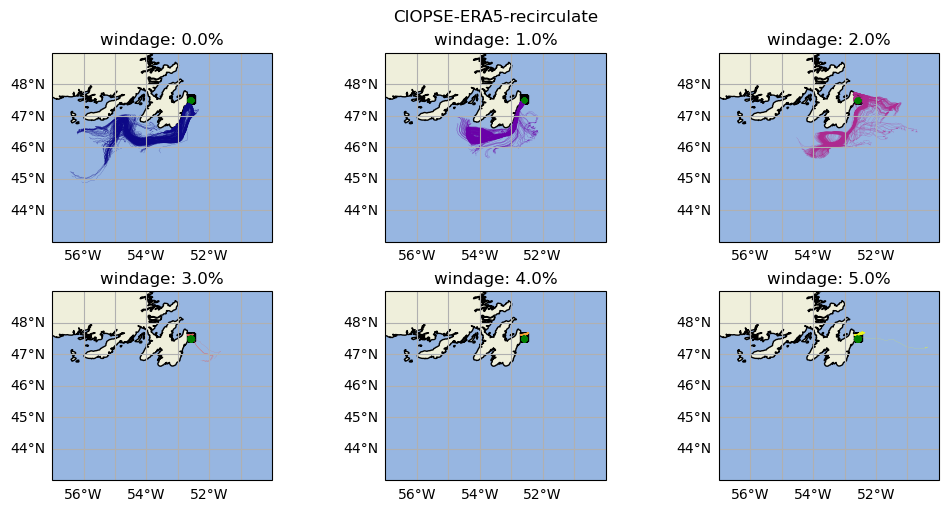

In [15]:
drift='forward'

fig, axs = plt.subplots(2,3,subplot_kw={'projection': ccrs.PlateCarree()},
                            figsize=(10,5),
                            sharex=True, sharey=True, constrained_layout=True)
end_times={}
end_lons={}
end_lats={}
for s in starts:
    sd = s.strftime("%Y%m%d%H")
    for windage, ax in zip(windages_str, axs.flatten()):
        files = glob.glob(f'{data_dir}/*{sd}*{drift}*wind{windage}_diff*.nc')
        d = xr.open_dataset(files[0])
        #dsel = d.sel(time=slice(drifter.TIME.values[0], drifter.TIME.values[-1]))
        dp=d.where((d.lon<360) | (d.lat<360), np.nan)
        print(windage)
        end_times[windage] = []
        end_lons[windage] = []
        end_lats[windage] = []
        for t in dp.trajectory.values:
            dp_t = dp.sel(trajectory=t)
            lons = np.ma.masked_invalid(dp_t.lon.values)
            lats = np.ma.masked_invalid(dp_t.lat.values)
            ax.plot(lons[~lons.mask], lats[~lats.mask], color=colour_mapping['{:.2f}'.format(float(windage))], 
                    lw=0.1,transform=ccrs.PlateCarree())
            ax.plot(lons[0], lats[0], 'g.')
            moving=dp_t.where(dp_t['moving']==1, drop=True)
            end_times[windage].append(moving.time.max().values)
            end_lons[windage].append(moving.lon.values[-1])
            end_lats[windage].append(moving.lat.values[-1])
        #ax.plot(drifter.LONGITUDE, drifter.LATITUDE, transform=ccrs.PlateCarree())
        #ax.plot(drifter.LONGITUDE.values[0], drifter.LATITUDE.values[0], 'go', transform=ccrs.PlateCarree())
        ax.coastlines()
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.OCEAN)

        ax.set_xlim([-57,-50])
        ax.set_ylim([43,49])
        ax.gridlines(draw_labels=['bottom', 'left'])
        ax.set_title(f'windage: {float(windage)*100}%')
        ax.plot(orig_lon, orig_lat, 'sk', transform=ccrs.PlateCarree(),zorder=0)
fig.suptitle('CIOPSE-ERA5-recirculate')

In [16]:
for w , a  in end_times.items():
    print(w, np.array(a).max(), np.array(a).min())
for w , a  in end_lons.items():
    print(w, np.array(a).max(), np.array(a).min(), np.array(a).mean(),)
for w , a  in end_lats.items():
    print(w, np.array(a).max(), np.array(a).min(), np.array(a).mean(),)

0.0 2025-01-27T23:45:00.000000000 2025-01-27T23:45:00.000000000
0.01 2025-01-27T23:45:00.000000000 2025-01-27T23:45:00.000000000
0.02 2025-01-27T23:45:00.000000000 2025-01-27T23:45:00.000000000
0.03 2025-01-27T23:45:00.000000000 2025-01-27T23:45:00.000000000
0.04 2025-01-27T23:45:00.000000000 2025-01-27T23:45:00.000000000
0.05 2025-01-27T23:45:00.000000000 2025-01-27T23:45:00.000000000
0.0 -52.82886 -56.4304 -54.951942
0.01 -52.155437 -54.713787 -53.93502
0.02 -50.695465 -54.524662 -52.889423
0.03 -51.828175 -52.697258 -52.679092
0.04 -52.686794 -52.69866 -52.695637
0.05 -50.40821 -52.697918 -52.681652
0.0 47.24014 44.905003 46.221455
0.01 46.97259 45.655125 46.36193
0.02 47.57737 45.641518 46.319424
0.03 47.61991 46.762413 47.589718
0.04 47.638824 47.598373 47.614277
0.05 47.62309 47.191616 47.60488


# CIOPSE-ERA5-waves-recirculate

In [29]:
data_dir='/data/viking-buoy-2025/ciopse-era5-waves-recirculate/'

0.0
0.01
0.02
0.03
0.04
0.05


Text(0.5, 0.98, 'CIOPSE-ERA5-waves-recirculate')

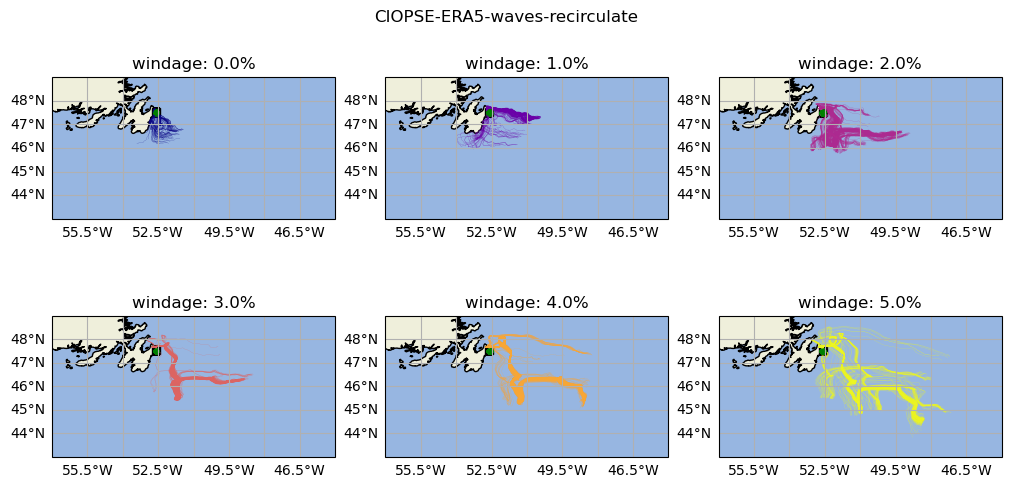

In [31]:
drift='forward'

fig, axs = plt.subplots(2,3,subplot_kw={'projection': ccrs.PlateCarree()},
                            figsize=(10,5),
                            sharex=True, sharey=True, constrained_layout=True)
end_times={}
end_lons={}
end_lats={}
for s in starts:
    sd = s.strftime("%Y%m%d%H")
    for windage, ax in zip(windages_str, axs.flatten()):
        files = glob.glob(f'{data_dir}/*{sd}*{drift}*wind{windage}_diff*.nc')
        d = xr.open_dataset(files[0])
        #dsel = d.sel(time=slice(drifter.TIME.values[0], drifter.TIME.values[-1]))
        dp=d.where((d.lon<360) | (d.lat<360), np.nan)
        print(windage)
        end_times[windage] = []
        end_lons[windage] = []
        end_lats[windage] = []
        for t in dp.trajectory.values:
            dp_t = dp.sel(trajectory=t)
            lons = np.ma.masked_invalid(dp_t.lon.values)
            lats = np.ma.masked_invalid(dp_t.lat.values)
            ax.plot(lons[~lons.mask], lats[~lats.mask], color=colour_mapping['{:.2f}'.format(float(windage))], 
                    lw=0.1,transform=ccrs.PlateCarree())
            ax.plot(lons[0], lats[0], 'g.')
            moving=dp_t.where(dp_t['moving']==1, drop=True)
            end_times[windage].append(moving.time.max().values)
            end_lons[windage].append(moving.lon.values[-1])
            end_lats[windage].append(moving.lat.values[-1])
        #ax.plot(drifter.LONGITUDE, drifter.LATITUDE, transform=ccrs.PlateCarree())
        #ax.plot(drifter.LONGITUDE.values[0], drifter.LATITUDE.values[0], 'go', transform=ccrs.PlateCarree())
        ax.coastlines()
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.OCEAN)

        ax.set_xlim([-57,-45])
        ax.set_ylim([43,49])
        ax.gridlines(draw_labels=['bottom', 'left'])
        ax.set_title(f'windage: {float(windage)*100}%')
        ax.plot(orig_lon, orig_lat, 'sk', transform=ccrs.PlateCarree(),zorder=0)
fig.suptitle('CIOPSE-ERA5-waves-recirculate')

In [32]:
for w , a  in end_times.items():
    print(w, np.array(a).max(), np.array(a).min())
for w , a  in end_lons.items():
    print(w, np.array(a).max(), np.array(a).min(), np.array(a).mean(),)
for w , a  in end_lats.items():
    print(w, np.array(a).max(), np.array(a).min(), np.array(a).mean(),)

0.0 2025-01-27T23:45:00.000000000 2025-01-27T23:45:00.000000000
0.01 2025-01-27T23:45:00.000000000 2025-01-27T23:45:00.000000000
0.02 2025-01-27T23:45:00.000000000 2025-01-27T23:45:00.000000000
0.03 2025-01-27T23:45:00.000000000 2025-01-27T23:45:00.000000000
0.04 2025-01-27T23:45:00.000000000 2025-01-27T23:45:00.000000000
0.05 2025-01-27T23:45:00.000000000 2025-01-27T23:45:00.000000000
0.0 -51.418102 -53.404587 -52.418114
0.01 -50.398766 -53.62501 -51.05417
0.02 -48.87539 -52.73498 -49.641506
0.03 -48.46052 -52.76367 -49.66021
0.04 -48.238785 -52.744316 -48.614655
0.05 -47.142876 -53.056633 -49.010544
0.0 47.609818 46.18072 47.109596
0.01 47.594433 45.95199 47.098133
0.02 47.702564 46.107704 46.640472
0.03 47.705215 46.247887 46.564686
0.04 47.701603 45.07592 45.670143
0.05 47.977966 43.824146 45.387


# Summary

REcommendation should be based on the 
1. CIOPSE-HRDPS simualtion
3. CIOPSE-ERA5-waves recirciulate

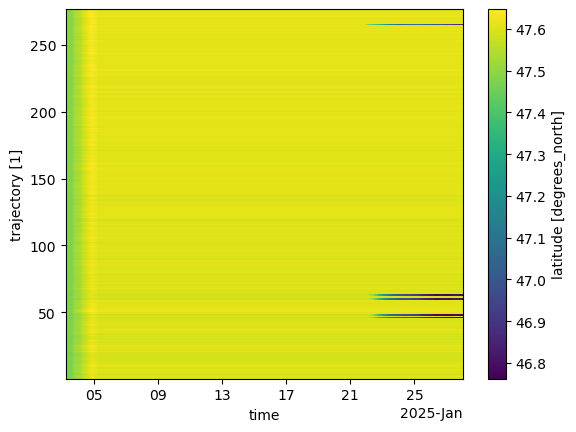

In [27]:
d = xr.open_dataset('/data/viking-buoy-2025/ciopse-era5-recirculate/opendrift-ciopse-hrdps-2025010306-forward-wind0.03_diff5.nc')
d.lat.plot()